/home/joseaverde/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/joseaverde/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


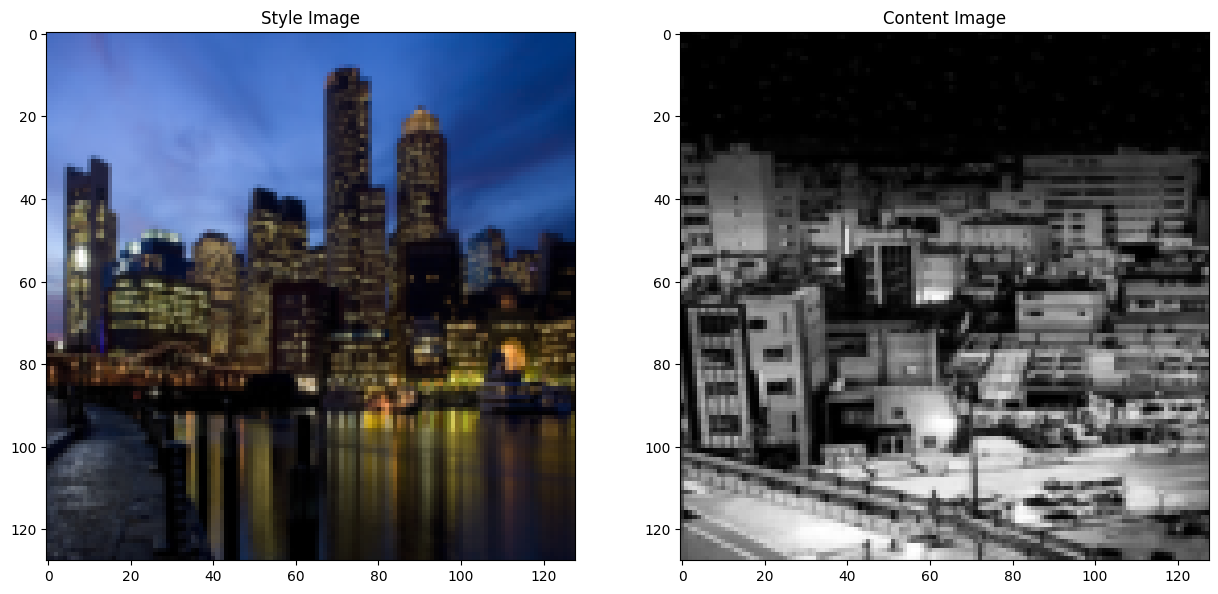

In [1]:
from neural_style import *

style_image = Image(path="images/photorealistic/style/tar3.png")
content_image = Image(path="images/manga/city-1.jpg")

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2,figsize=(15,15))
ax0, ax1 = axes.flatten()
style_image.show(title='Style Image',ax=ax0)
content_image.show(title='Content Image',ax=ax1)

Building the style transfer model..


/home/joseaverde/artificial_vision_final/neural_style/neural_style.py:169: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/home/joseaverde/artificial_vision_final/neural_style/neural_style.py:170: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


TypeError: unsupported operand type(s) for -: 'Inner' and 'Tensor'

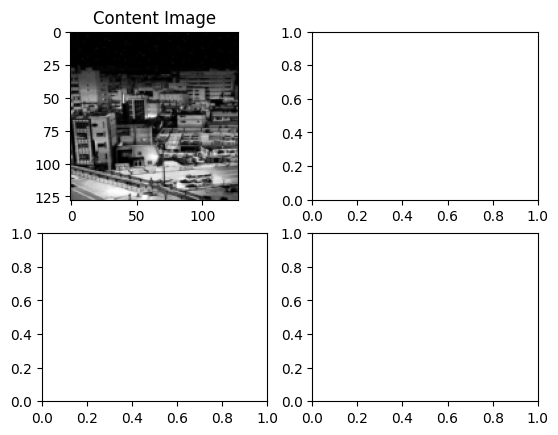

In [2]:
# Generate a folder to save results
result_dir='results'
exp_dir=os.path.join(result_dir,'exp2')
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

# Content image
input_image = content_image.clone()

# add the original input image to the figure:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = axes.flatten()
input_image.show(title='Content Image',ax=ax1)
input_image.save(os.path.join(exp_dir,'input_content.png'))


output = run_style_transfer(cnn, cnn_normalization_mean(), cnn_normalization_std(),
                            content_image, style_image, input_image, num_steps=300,print_step=100)

output.show(title='Output Image',ax=ax2)
output.save(os.path.join(exp_dir,'output_content_300.png'))


# White noise
input_image = torch.randn(content_image.data.size(), device=device)
input_image.show(title='White noise',ax=ax3)
# Gaussian smooth
from scipy.ndimage import gaussian_filter
input_image=gaussian_filter(ininput_imageput_img.squeeze().permute(1,2,0).cpu().numpy(), 3.0)
input_image=input_image-input_image.min()
input_image=input_image/input_image.max()
input_image=torch.from_numpy(np.ascontiguousarray(np.transpose(input_image,(2,0,1)))).unsqueeze(0).to(device,torch.float)
input_image.save(os.path.join(exp_dir,'input_noise.png'))
output = run_style_transfer(cnn, cnn_normalization_mean(), cnn_normalization_std(),
                            content_image, style_image, input_image, num_steps=900,print_step=100)

output.show(title='Output Image',ax=ax4)
output.save(os.path.join(exp_dir,'output_noise.png'))